In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     |████████████████████████████████| 25.9 MB 1.1 MB/s 
     |████████████████████████████████| 10.9 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 102 kB 10.8 MB/s 
     |████████████████████████████████| 675 kB 52.7 MB/s 
     |████████████████████████████████| 4.7 MB 38.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 51.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=ec1c3ca508777ea6b1e80f3340a84636089a59d865936a9cfc9f616558e61dfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-7uvazw34/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8996aeef27c50a96dc8c57c4f7135b42ede35831a088e61dda051f04588dea2b
  Stored in directory: /ro

In [ ]:
import pandas as pd
import requests
import numpy as np

Using a dataset from levels.fyi, a site built to crowdsource engineering salaries and increase visibility of other's salaries. This is an intro project, and we are using [this article](https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e) to get started.

In [ ]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)

df = df.drop(['dmaid','rowNumber', 'cityid'], axis=1) # Drop useless columns
df = df.replace("", np.nan)

In [ ]:
df.head(10)

timestamp    company level  ...  bonus gender otherdetails
0   6/7/2017 11:33:27     Oracle    L3  ...     10    NaN          NaN
1  6/10/2017 17:11:29       eBay  SE 2  ...    NaN    NaN          NaN
2  6/11/2017 14:53:57     Amazon    L7  ...    NaN    NaN          NaN
3  6/14/2017 21:22:25  Microsoft    64  ...  30000    NaN          NaN
4  6/16/2017 10:44:01     Amazon    L5  ...  53000    NaN          NaN
5   6/17/2017 0:23:14      Apple    M1  ...     35    NaN          NaN
6  6/20/2017 10:58:51  Microsoft    60  ...    NaN    NaN          NaN
7  6/20/2017 18:49:59     Amazon    L5  ...    NaN    NaN          NaN
8  6/21/2017 17:27:47  Microsoft    63  ...    NaN    NaN          NaN
9  6/22/2017 12:37:51  Microsoft    65  ...     55    NaN          NaN

[10 rows x 14 columns]

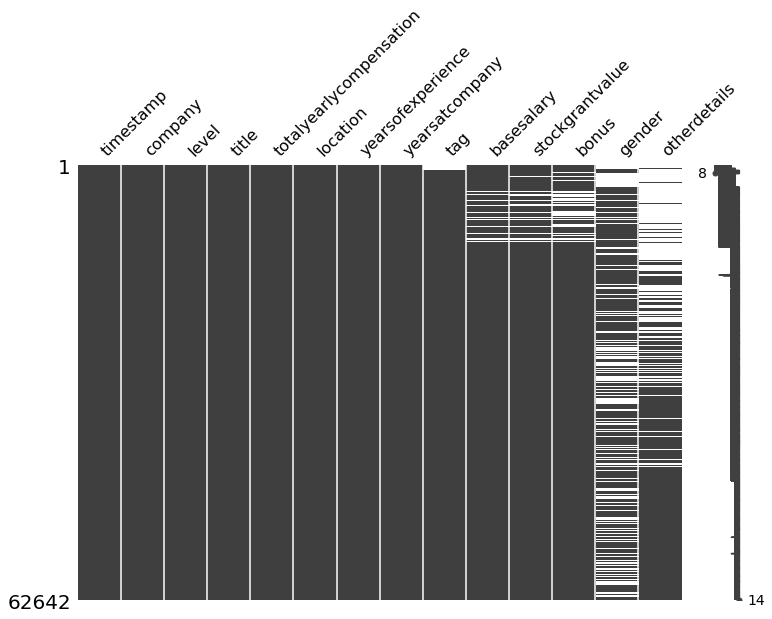

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(12, 8)) # visualizing data missing from the dataset

In [ ]:
# change datatypes for more friendly form for analysis 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)

In [ ]:
import pandas_profiling as pp
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Comparing Total Compensation for Women and Men
I specifically want to look at individuals at the same *company*, same *title*, same *level*, same *experience*.

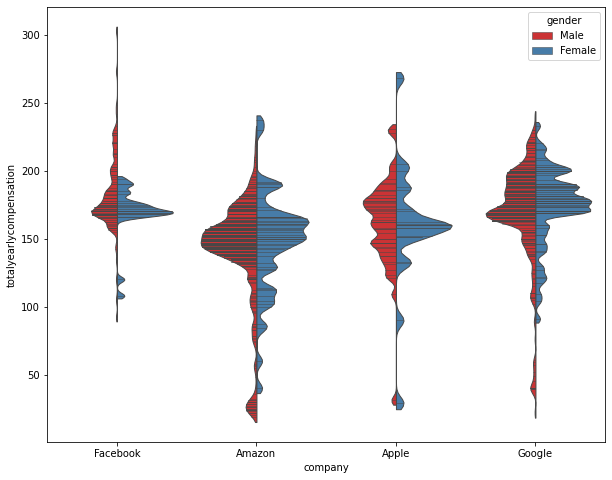

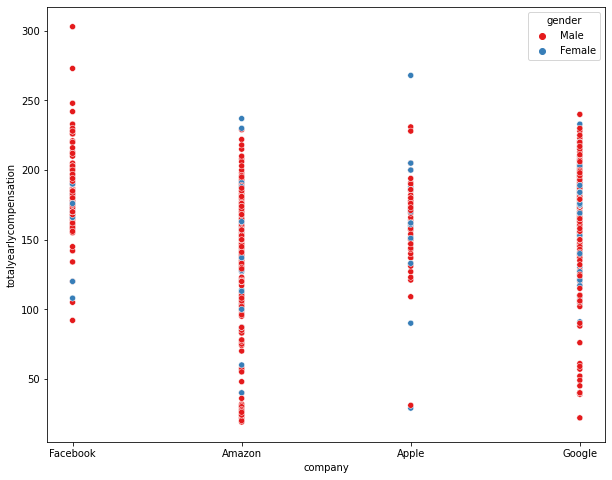

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

facebook0 = df.query("company in ('Facebook') and title in ('Software Engineer') and level in ('E3') and yearsofexperience<2 and gender in ('Female', 'Male')")
amazon0 = df.query("company in ('Amazon') and title in ('Software Engineer') and level in ('L4') and yearsofexperience<2 and gender in ('Female', 'Male')")
apple0 = df.query("company in ('Apple') and title in ('Software Engineer') and level in ('ICT2') and yearsofexperience<2 and gender in ('Female', 'Male')")
netflix0 = df.query("company in ('Netflix') and title in ('Software Engineer') and level in ('L1') and yearsofexperience<2 and gender in ('Female', 'Male')")
google0 = df.query("company in ('Google') and title in ('Software Engineer') and level in ('L3') and yearsofexperience<2 and gender in ('Female', 'Male')")
indivs0 = pd.concat([facebook0, amazon0, apple0, netflix0, google0], ignore_index=True)

plt.figure(figsize=(10, 8))
g = sns.violinplot(data=indivs0, palette="Set1", split = True, x='company', hue='gender',y='totalyearlycompensation', inner='stick', bw=.1, cut=1, linewidth=1)
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs0, palette="Set1", x='company', hue='gender',y='totalyearlycompensation')

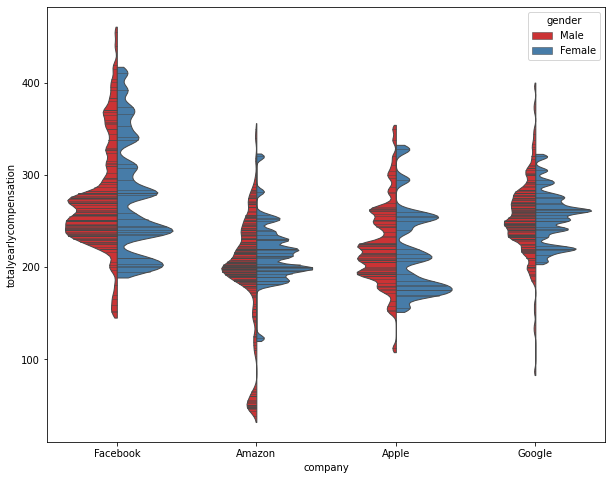

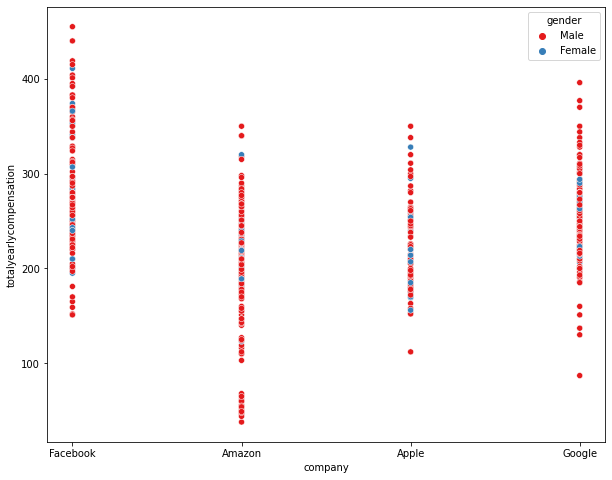

In [ ]:
facebook1 = df.query("company in ('Facebook') and title in ('Software Engineer') and level in ('E4', 'E5') and yearsofexperience>=2 and yearsofexperience<4 and gender in ('Female', 'Male')")
amazon1 =  df.query("company in ('Amazon') and title in ('Software Engineer') and level in ('L5') and yearsofexperience>=2 and yearsofexperience<4 and gender in ('Female', 'Male')")
apple1 =  df.query("company in ('Apple') and title in ('Software Engineer') and level in ('ICT3') and yearsofexperience>=2 and yearsofexperience<4 and gender in ('Female', 'Male')")
netflix1 = df.query("company in ('Netflix') and title in ('Software Engineer') and level in ('L1') and yearsofexperience>=2 and yearsofexperience<4 and gender in ('Female', 'Male')")
google1 = df.query("company in ('Google') and title in ('Software Engineer') and level in ('L4') and yearsofexperience>=2 and yearsofexperience<4 and gender in ('Female', 'Male')")
indivs1 = pd.concat([facebook1, amazon1, apple1, netflix1, google1], ignore_index=True)

plt.figure(figsize=(10, 8))
g = sns.violinplot(data=indivs1, palette="Set1", split = True, x='company', hue='gender',y='totalyearlycompensation', inner='stick', bw=.1, cut=1, linewidth=1)
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs1, palette="Set1", x='company', hue='gender',y='totalyearlycompensation')

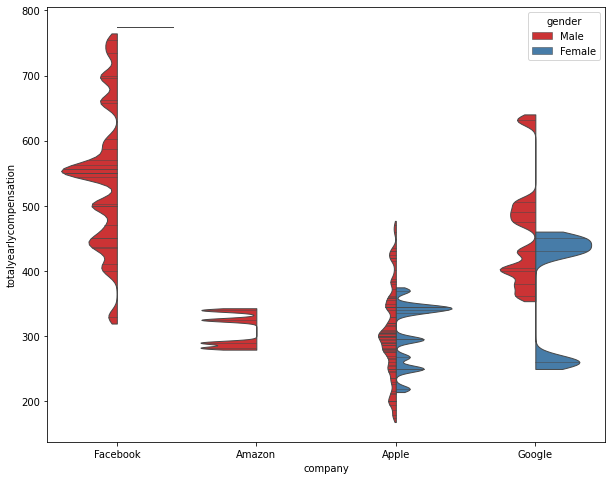

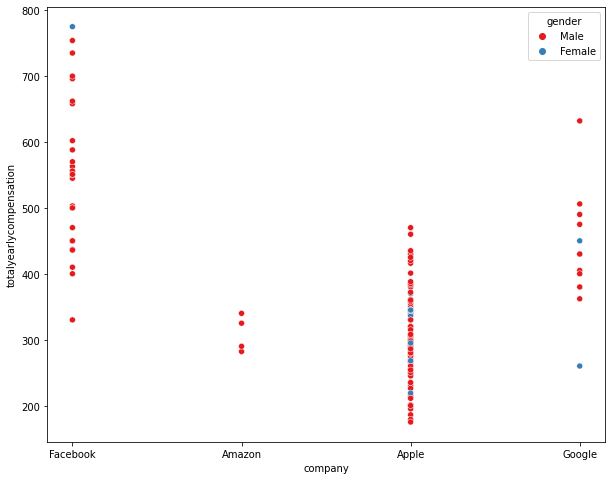

In [ ]:
facebook2 = df.query("company in ('Facebook') and title in ('Software Engineer') and level in ('E6') and yearsofexperience>=4 and yearsofexperience<8 and gender in ('Female', 'Male')")
amazon2 = df.query("company in ('Amazon') and title in ('Software Engineer') and level in ('Senior SDE') and yearsofexperience>=4 and yearsofexperience<8 and gender in ('Female', 'Male')")
apple2 =  df.query("company in ('Apple') and title in ('Software Engineer') and level in ('ICT4') and yearsofexperience>=4 and yearsofexperience<8 and gender in ('Female', 'Male')")
netflix2 = df.query("company in ('Netflix') and title in ('Software Engineer') and level in ('Senior Software Engineer') and yearsofexperience>=8 and yearsofexperience<4 and gender in ('Female', 'Male')")
google2 = df.query("company in ('Google') and title in ('Software Engineer') and level in ('L6') and yearsofexperience>=4 and yearsofexperience<8 and gender in ('Female', 'Male')")
indivs2 = pd.concat([facebook2, amazon2, apple2, netflix2, google2], ignore_index=True)

plt.figure(figsize=(10, 8))
g = sns.violinplot(data=indivs2, palette="Set1", split = True, x='company', hue='gender',y='totalyearlycompensation', inner='stick', bw=.1, cut=1, linewidth=1)
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs2, palette="Set1", x='company', hue='gender',y='totalyearlycompensation')

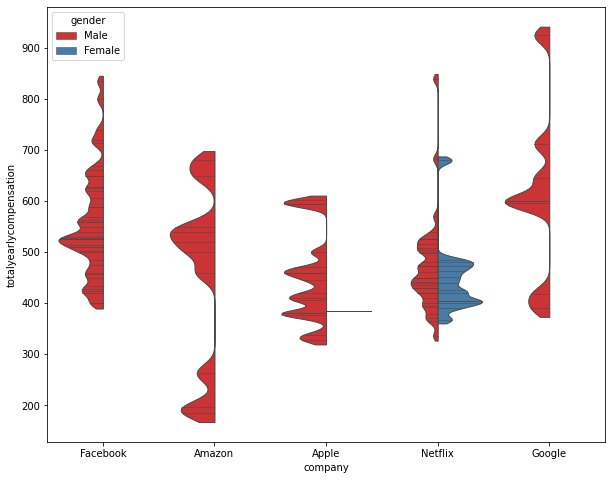

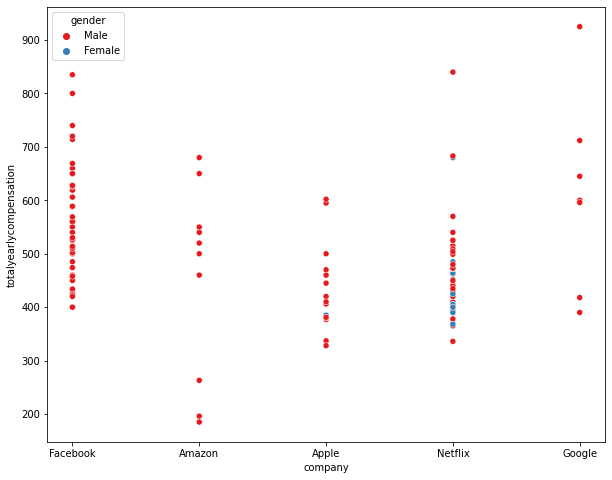

In [ ]:
facebook3 = df.query("company in ('Facebook') and title in ('Software Engineer') and level in ('E6') and yearsofexperience>=8 and yearsofexperience<12 and gender in ('Female', 'Male')")
amazon3 =  df.query("company in ('Amazon') and title in ('Software Engineer') and level in ('L7') and yearsofexperience>=8 and yearsofexperience<12 and gender in ('Female', 'Male')")
apple3 =  df.query("company in ('Apple') and title in ('Software Engineer') and level in ('ICT5') and yearsofexperience>=8 and yearsofexperience<12 and gender in ('Female', 'Male')")
netflix3 = df.query("company in ('Netflix') and title in ('Software Engineer') and level in ('Senior Software Engineer') and yearsofexperience>=8 and yearsofexperience<12 and gender in ('Female', 'Male')")
google3 = df.query("company in ('Google') and title in ('Software Engineer') and level in ('L7') and yearsofexperience>=8 and yearsofexperience<12 and gender in ('Female', 'Male')")
indivs3 = pd.concat([facebook3, amazon3, apple3, netflix3, google3], ignore_index=True)

plt.figure(figsize=(10, 8))
g = sns.violinplot(data=indivs3, palette="Set1", split = True, x='company', hue='gender',y='totalyearlycompensation', inner='stick', bw=.1, cut=1, linewidth=1)
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs3, palette="Set1", x='company', hue='gender',y='totalyearlycompensation')

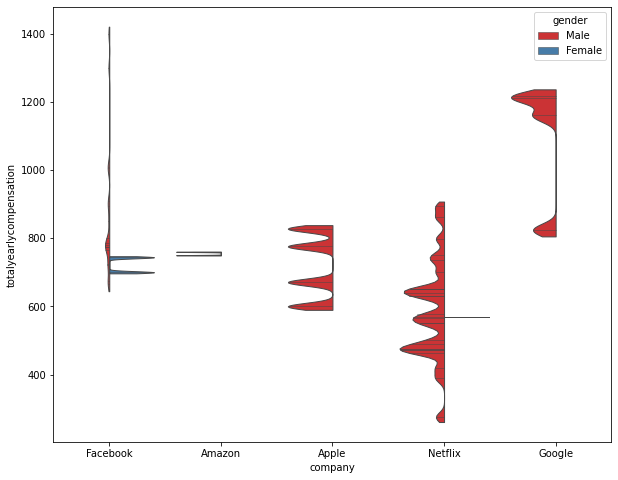

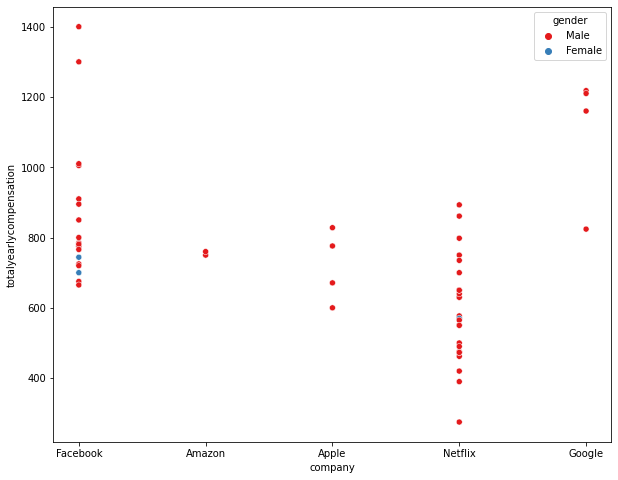

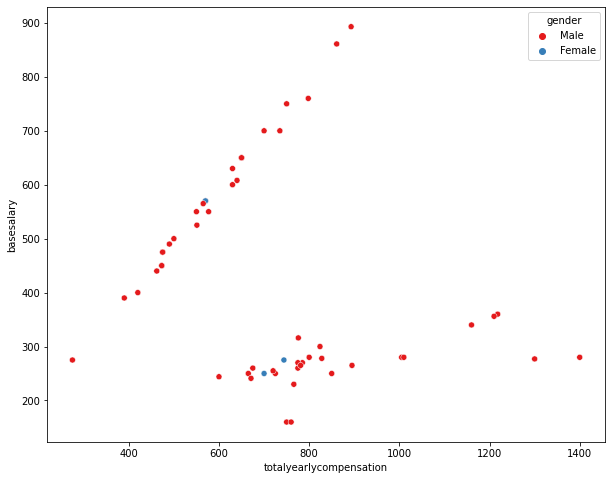

In [ ]:
facebook4 = df.query("company in ('Facebook') and title in ('Software Engineer') and level in ('E7', 'E8') and yearsofexperience>=12 and gender in ('Female', 'Male')")
amazon4 =  df.query("company in ('Amazon') and title in ('Software Engineer') and level in ('L8') and yearsofexperience>=12 and gender in ('Female', 'Male')")
apple4 =  df.query("company in ('Apple') and title in ('Software Engineer') and level in ('ICT6') and yearsofexperience>=12 and gender in ('Female', 'Male')")
netflix4 = df.query("company in ('Netflix') and title in ('Software Engineer') and level in ('Senior Software Engineer') and yearsofexperience>=12 and gender in ('Female', 'Male')")
google4 = df.query("company in ('Google') and title in ('Software Engineer') and level in ('L8') and yearsofexperience>=12 and gender in ('Female', 'Male')")
indivs4 = pd.concat([facebook4, amazon4, apple4, netflix4, google4], ignore_index=True)

# some obvious outliers we must take out (people putting in 400000 when the 
# category is meant to input 400 for 400K)
plt.figure(figsize=(10, 8))
g = sns.violinplot(data=indivs4, palette="Set1", split = True, x='company', hue='gender',y='totalyearlycompensation', inner='stick', bw=.1, cut=1, linewidth=1)
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs4, palette="Set1", x='company', hue='gender',y='totalyearlycompensation')
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=indivs4, palette="Set1", x='totalyearlycompensation', hue='gender',y='basesalary')

In [ ]:
indivs4.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Todo: write out queries by time, and see the
change over time.
- statistics:

theory
*   Postive trend over time, women making more , gender inequality in pay decreasing over time.

